<a href="https://colab.research.google.com/github/CodyDrolet/NCAA/blob/main/NCAAFinal_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Cody Drolet
    Final Project
    May 2,2023
    NCAA

Showcased


*   Data wrangling
*   Data Heiarchies
*   SKLearn Pipelines
*   Correlation Matrix
*   Supervised Machine Learning tools
*   String Joins
*   python list manipulation
*   Feature engineering









# Data

https://collegefootballdata.com/exporter/lines?year=2022&seasonType=regular \\

https://www.kaggle.com/datasets/benjaminallen24/ap-top-25-ncaaf-poll-rankings-20222023

My data is coming from the college football data.com and I will be using multiple data sets from them. The goal is to    
First, build model A that predicts the effect each result of game will have on that teams votes count. Once that is complete then we can use that predicted model to find rank per week
Model A only works AFTER the game is done


From the games section I will be using **Games and results**
**Season Calendar**
From the rankings section I will be using
**Historical polls and rankings**
Then from the metrics section I will be using
**Offense_overall**
**defense_overall**

From the kaggle dataset I get teams outside the top ten and there corresponding votes they recieved.


# Background

In NCAA football the BCS(Bowl Champion Series) comittee meets on a weekly basis and makes a AP(Associated press) top 25 poll. These polls are used to rank collegiate football teams based on not only there previous week but what they have done all season considering strength of schedule and win-loss records. These polls are important because they lead to the college football playoffs and bowl games. The voting for the top 25 is composed of 62 sportswriters and broadcasters from across the nation.(for AP) The Voting for the top 25 is composed of 65 coaches across the nation.(Coaches poll) Each writer votes who they think deserves the number 1 ranked spot and so on down to 25. Then the teams are given points based on how many votes they got and for what placing
1st ~ 25 points

* 1st ~ 25 points
* 2nd ~ 24 points
* 3rd ~ 23 points
* 4th ~ 22 points
* 5th ~ 21 points
* 6th ~ 20 points
* 7th ~ 19 points
* 8th ~ 18 points
* 9th ~ 17 points
* 10th ~ 16 points
* 11th ~ 15 points
* 12th ~ 14 points
* 13th ~ 13 points
* 14th ~ 12 points
* 15th ~ 11 points
* 16th ~ 10 points
* 17th ~ 9 points
* 18th ~ 8 points
* 19th ~ 7 points
* 20th ~ 6 points
* 21th ~ 5 points
* 22nd ~ 4 points
* 23rd ~ 3 points
* 24th ~ 2 points
* 25th ~ 1 point

After the voting is done the team with the most points gets placed in first place and so on. Without looking two deep into it the process seems fair and that the best teams more often then not get the proper recocgnition but this is not always the case. The problem faced is that not every team plays the same level of competitition and or has the same schedule. This creates something called conference bias where teams with more known to be more difficult schedules tend to get the benefit of the doubt in these rankings. This can cause teams that might deserve to be in these rankings but arent in as prestigious of conference to be overlooked. This model will attempt to fairly place BCS points and create a top 25 eliminating conference bias.

My Target Variable is going to be the differnce in votes per week and this will eventually lead to predicting the rank of each team by week. First things first we need to determine the biggest cause of drop or gain in rank.

My features are as listed and will change every week.
	team_points_x	opponent_points_x	won_x	loss_x	total_win_count_x	total_loss_count_x	opponent_rank	opponent_votes	offense_overall_x	defense_overall_x	team_rank	team_votes	cumulative_count	difference_per_week


1. Loss- wether the team lost the game or not
2. Win- wether the team won the game or not.
3. team_votes: how many votes the home got to be ranked.
4. Opponent_votes: how many votes the opponent got to be ranked.
5. Teampoints ~ how many points the home team scored
6. opponent_points_x ~ how many points the away team scored.


Overall_offense- is calculated by summing up the Total EPA(Estimated points added) for all offensive plays in a game and dividing by the total number of offensive possessions in the game. This gives the average OPPA(Offense predicated Points Added) per offensive possession for the team over the course of the game.

Overall OPPA takes into account a team's offensive performance over the game and is useful for evaluating the effectiveness of a team's offense in comparison to other teams in the same conference or division, or across the entire NCAA. A higher OPPA indicates a more effective offense that is able to consistently add points to the team's score throughout the season, while a lower OPPA indicates a less productive offense that may struggle to move the ball and score points.

Defense_overall to calculate DPPA(defense predicated points added), the same basic process used for OPPA can be applied to the defense. Specifically, the Success Rate and Expected Points Added (EPA) for each defensive play can be calculated to obtain the Total EPA for all defensive plays in a game. Then, the Total EPA can be divided by the total number of defensive possessions in the game to obtain the average DPPA per defensive possession for the team over the course of the game.

Like OPPA, DPPA takes into account a team's defensive performance during the game and is useful for evaluating the effectiveness of a team's defense in comparison to other teams in the same conference or division, or across the entire NCAA. A higher DPPA indicates a more effective defense that is able to consistently prevent points from being scored by the opposing team, while a lower DPPA indicates a less effective defense that may struggle to stop the opposing team from moving the ball and scoring points.

In a game a teams offense and defense directly dependant on the other teams offense and defense performance so one teams offense performance number will be the opposing teams defense performance number and vice versa.









# Data Wrangling

I had a table with every game in NCAA football 2022 and a table set with rank of every team that received votes by week for the season. What I need to do is figure out the teams rank and its opponent rank on the given week. Then I calculate vote_difference per week which would be my target variable and we want to see if there is correlation between a team lsoing or winning and its total votes recieved.

In [ ]:
! pip install -q 'git+https://github.com/drscook/helpers'
! pip install -q --upgrade numpy pandas scikit-learn matplotlib shap jupyter-autotime
# restart kernel so upgrade takes effect
from IPython import get_ipython
get_ipython().kernel.do_shutdown(True)

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 74.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.


{'status': 'ok', 'restart': True}

In [ ]:
import plotly.express as px
import pandas as pd
import io
import missingno as msno
from google.colab import auth
from helpers.common_imports import *
from helpers import utilities as ut
bq = ut.BigQuery()
auth.authenticate_user()
from google.cloud import bigquery
client = bigquery.Client('tarletondatascience2022.drolet')

In [ ]:
NCAA = 'tarletondatascience2022.drolet.NCAA2'#375 Gives me top25 by week and points given to the team
#School(String) & Week(INT) will be in common
Games = 'tarletondatascience2022.drolet.NCAASchedule'#858 Gives me home team and away team and points for each for each game in the NCAA 2022
#ID(INT) is common use
Ap = 'tarletondatascience2022.drolet.Ap25'#67 Wide format need to move to long but gives me teams just outside the 25
#college(String) & Week(Int)
Stats = 'tarletondatascience2022.drolet.Stats'#1521 defense and offense overall for the home team each game
Ap2 = 'tarletondatascience2022.drolet.Ap2'#1005 gives me Ap table in long format
#week(int) & College(string)
Rank = 'tarletondatascience2022.drolet.RankPoint'#1005 AP and NCAA joined
Outcomes= 'tarletondatascience2022.drolet.Win'#1716 Team its record and rank at the time of the game as well as offense and defense overall
final_table='tarletondatascience2022.drolet.final_table'

In [ ]:
#This takes my ranking table and flips it from wide to long format to make the model easier to handle.
qry2 = f'''
SELECT
 *,
FROM
  {Ap}

'''
df2 = bq.qry_to_df(qry2).fillna(float('nan'))
melted_df = pd.melt(df2,id_vars=['college'],
value_vars=[  'week_1','week_2','week_3',
'week_4','week_5','week_6',
'week_7','week_8','week_9',
'week_10','week_11','week_12',
'week_13','week_14','week_15'], var_name='week', value_name ='rank')
melted_df['week']= melted_df['week'].replace({'week_1':'1'
,'week_2':'2','week_3':'3'
,'week_4':'4','week_5':'5'
,'week_5':'5','week_6':'6'
,'week_7':'7','week_8':'8'
,'week_9':'9','week_10':'10'
,'week_11':'11','week_12':'12'
,'week_13':'13','week_14':'14'
,'week_15':'15'})
melted_df['week']=melted_df['week'].astype(int)
tbl = f"tarletondatascience2022.drolet.Ap2"
#bq.df_to_tbl(melted_df,tbl)
df2

,college,week_1,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,week_10,week_11,week_12,week_13,week_14,week_15,week_16
index,,,,,,,,,,,,,,,,,
0,Texas A&M,6,6,24,23,17,38,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,Oklahoma,9,7,6,6,18,40,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,Baylor,10,9,17,17,16,27,27,<NA>,<NA>,33,31,<NA>,<NA>,<NA>,<NA>,<NA>
3,Oklahoma State,12,11,8,9,9,7,8,11,9,18,30,24,35,<NA>,<NA>,<NA>
4,Michigan State,15,14,11,26,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Illinois,<NA>,<NA>,<NA>,<NA>,<NA>,36,24,18,17,14,21,32,30,33,33,40
63,Boise State,40,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,38,<NA>,35,29,29,34,29
64,Pittsburgh,17,17,23,24,24,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,35,35,22


Joining these tables that will give me every ranked team and there corresponding votes.

In [ ]:
#this is the join that gives me points for every ranked team joined with ranked teams.
qry = f'''
select
A.college,
A.school,
A.week,
A.rank,
B.points
from
(
  select
  *,
  replace(replace(college, 'UNC','North Carolina'),'UTSA','UT San Antonio') as school
  from
  {Ap2}
) as A
left join
  {NCAA} as B
on
  LTRIM(RTRIM(A.school)) = LTRIM(RTRIM(B.school))
  and
  A.week = B.week
order by A.week asc
'''
df4 = bq.qry_to_df(qry)
df4

,college,school,week,rank,points
index,,,,,
0,Air Force,Air Force,1,41,<NA>
1,Appalachian State,Appalachian State,1,42,<NA>
2,UCLA,UCLA,1,43,<NA>
3,South Carolina,South Carolina,1,44,<NA>
4,Kansas,Kansas,1,<NA>,<NA>
...,...,...,...,...,...
1000,Illinois,Illinois,15,33,<NA>
1001,Boise State,Boise State,15,34,<NA>
1002,Pittsburgh,Pittsburgh,15,35,<NA>


For missing data I had to indiviually enter it in.

In [ ]:
#I had to go in indiviually and add points for teams outside the top 25
df4.loc[(df4['school']=='Tennessee') & (df4['week']== 1),['points']]=180
df4.loc[(df4['school'] =='Texas') & (df4['week'].isin([1, 2, 9, 10, 12])), 'points'] = [164, 118, 38, 58, 65]
df4.loc[(df4['school'] == 'Iowa') & (df4['week'].isin([1, 3,13])), 'points'] = [163, 4, 5]
df4.loc[(df4['school'] == 'Penn State') & (df4['week'].isin([1, 2])), 'points'] = [160, 122]
df4.loc[(df4['school'] == 'LSU') & (df4['week'].isin([1,4,5,7,8])), 'points'] = [55,6,7,4,87]
df4.loc[(df4['school'] == 'Fresno State') & (df4['week'].isin([1, 2,13,14,15])), 'points'] = [32,42,1,4,25]
df4.loc[(df4['school'] == 'Minnesota') & (df4['week'].isin([1, 2,3,4,6,7,8,12,14,15])), 'points'] = [31,22,37,48,14,5,1,7,1,2]
df4.loc[(df4['school'] == 'UCF') & (df4['week'].isin([1, 2,8,15])), 'points'] = [27,22,13,36]
df4.loc[(df4['school'] == 'Purdue') & (df4['week'].isin([1, 2,3,6,7,8,13,14,15])), 'points'] = [17,1,1,2,34,95,2,24,17]
df4.loc[(df4['school'] == 'Mississippi State') & (df4['week'].isin([1, 2,3,9,10,11,13])), 'points'] = [15,10,43,10,5,8,3]
df4.loc[(df4['school'] == 'Auburn') & (df4['week'].isin([1, 2,3])), 'points'] = [15,15,4]
df4.loc[(df4['school'] == 'Kansas State') & (df4['week'].isin([1, 2,3])), 'points'] = [14,18,77]
df4.loc[(df4['school'] == 'Florida') & (df4['week'].isin([1,5,6,7,12])), 'points'] = [14,56,37,56,6]
df4.loc[(df4['school'] == 'North Carolina') & (df4['week'].isin([1,2,3,4,6,7,15])), 'points'] = [9,3,37,72,5,98,39]
df4.loc[(df4['school'] == 'Boise State') & (df4['week'].isin([1,10,12,13,14,15])), 'points'] = [5,4,5,16,39,6]
df4.loc[(df4['school'] == 'Air Force') & (df4['week'].isin([1,2,3])), 'points'] = [4,8,19]
df4.loc[(df4['school'] == 'Appalachian State') & (df4['week'].isin([1,3,4])), 'points'] = [4,80,77]
df4.loc[(df4['school'] == 'UCLA') & (df4['week'].isin([1,2,5])), 'points'] = [2,1,3]
df4.loc[(df4['school'] == 'South Carolina') & (df4['week'].isin([1,2,7,8,10,11,13])), 'points'] = [2,2,12,13,2,6,44]
df4.loc[(df4['school'] == 'Oregon') & (df4['week'].isin([2])), 'points'] = [131]
df4.loc[(df4['school'] == 'Cincinnati') & (df4['week'].isin([2,3,4,5,10,11,14,15])), 'points'] = [63,80,52,60,32,74,43,32]
df4.loc[(df4['school'] == 'Oregon State') & (df4['week'].isin([2,3,4,5,8,9,11])), 'points'] = [5,42,49,16,6,25,3]
df4.loc[(df4['school'] == 'Marshall') & (df4['week'].isin([3])), 'points'] = [85]
df4.loc[(df4['school'] == 'Florida State') & (df4['week'].isin([2,3,4,6,7,8,9,10])), 'points'] = [42,42,85,78,18,1,1,8]
df4.loc[(df4['school']=='Washington State') & (df4['week'].isin([3,4,5,6,7])), 'points'] = [30,62,31,91,10]
df4.loc[(df4['school']=='Notre Dame') & (df4['week'].isin([3,7,10])), 'points'] = [23,58,24]
df4.loc[(df4['school']=='Texas Tech') & (df4['week'].isin([3,5])), 'points'] = [17,11]
df4.loc[(df4['school']=='Wisconsin') & (df4['week'].isin([3,4])), 'points'] = [7,4]
df4.loc[(df4['school']=='Michigan State') & (df4['week'].isin([4])), 'points'] = [91]
df4.loc[(df4['school']=='Kansas') & (df4['week'].isin([4,5,8,11])), 'points'] = [23,125,12,10]
df4.loc[(df4['school']=='Syracuse') & (df4['week'].isin([4,5])), 'points'] = [7,22]
df4.loc[(df4['school']=='James Madison') & (df4['week'].isin([5,6,8,14,15])), 'points'] = [4,39,6,4,1]
df4.loc[(df4['school']=='Tulane') & (df4['week'].isin([5,6,7])), 'points'] = [3,9,42]
df4.loc[(df4['school']=='TCU') & (df4['week'].isin([5])), 'points'] = [1]
df4.loc[(df4['school']=='Baylor') & (df4['week'].isin([6,7,10,11])), 'points'] = [88,91,9,19]
df4.loc[(df4['school']=='Arkansas') & (df4['week'].isin([6,8,9,10,13])), 'points'] = [76,1,1,11,2]
df4.loc[(df4['school']=='Maryland') & (df4['week'].isin([6,7,9,10])), 'points'] = [25,4,8,36]
df4.loc[(df4['school']=='Coastal Carolina') & (df4['week'].isin([6,7,10,11,14])), 'points'] = [17,61,8,46,6]
df4.loc[(df4['school']=='Illinois') & (df4['week'].isin([6,12,13,14,15])), 'points'] = [6,13,12,10,11]
df4.loc[(df4['school']=='Texas A&M') & (df4['week'].isin([6])), 'points'] = [4]
df4.loc[(df4['school']=='Oklahoma') & (df4['week'].isin([6])), 'points'] = [2]
df4.loc[(df4['school']=='BYU') & (df4['week'].isin([7])), 'points'] = [61]
df4.loc[(df4['school']=='San Jose State') & (df4['week'].isin([7,11])), 'points'] = [1,1]
df4.loc[(df4['school']=='Liberty') & (df4['week'].isin([8,9,12])), 'points'] = [2,35,15]
df4.loc[(df4['school']=='Troy') & (df4['week'].isin([9,10,11,12,13,14])), 'points'] = [3,7,5,22,34,80]
df4.loc[(df4['school']=='UT San Antonio') & (df4['week'].isin([9,10,11,12,13])), 'points'] = [1,1,5,51,85]
df4.loc[(df4['school']=='Washington') & (df4['week'].isin([3,9,10])), 'points'] = [1,1,12]
df4.loc[(df4['school']=='Kentucky') & (df4['week'].isin([10,11])), 'points'] = [57,61]
df4.loc[(df4['school']=='East Carolina') & (df4['week'].isin([10])), 'points'] = [2]
df4.loc[(df4['school']=='Louisville') & (df4['week'].isin([10,11,13])), 'points'] = [1,3,5]
df4.loc[(df4['school']=='Wake Forest') & (df4['week'].isin([11])), 'points'] = [34]
df4.loc[(df4['school']=='Oklahoma State') & (df4['week'].isin([11,13])), 'points'] = [21,2]
df4.loc[(df4['school']=='NC State') & (df4['week'].isin([12,14])), 'points'] = [77,62]
df4.loc[(df4['school']=='Duke') & (df4['week'].isin([12])), 'points'] = [16]
df4.loc[(df4['school']=='South Alabama') & (df4['week'].isin([8,12,13,14,15])), 'points'] = [4,1,3,12,17]
df4.loc[(df4['school']=='Pittsburgh') & (df4['week'].isin([14,15])), 'points'] = [5,4]
df4.loc[(df4['school']=='Ohio') & (df4['week'].isin([14])), 'points'] = [2]
df4.loc[(df4['school']=='Ole Miss') & (df4['week'].isin([14,15])), 'points'] = [22,27]
#tbl = f"tarletondatascience2022.drolet.RankPoint"
#bq.df_to_tbl(df4,tbl)
#msno.bar(df4)
df4

,college,school,week,rank,points
index,,,,,
0,Air Force,Air Force,1,41,4
1,Appalachian State,Appalachian State,1,42,4
2,UCLA,UCLA,1,43,2
3,South Carolina,South Carolina,1,44,2
4,Kansas,Kansas,1,<NA>,<NA>
...,...,...,...,...,...
1000,Illinois,Illinois,15,33,11
1001,Boise State,Boise State,15,34,6
1002,Pittsburgh,Pittsburgh,15,35,4


This gets rid of the idea of home and away and creates opponent and team. So there should be two rows for every game that happened.

In [ ]:
#this shows how many times the home team won
home = f'''
SELECT
  id,
  week,
  home_team as team,
  away_team as opponent,
  home_points as competitor_points,
  away_points as opponent_points,
  case when home_points > away_points then 1 else 0 end as won,
  case when home_points < away_points then 1 else 0 end as loss
FROM
  {Games}
'''
home1 = bq.qry_to_df(home)
#this shows how many times the away team won
away = f'''
SELECT
  id,
  week,
  away_team as team,
  home_team as opponent,
  away_points as competitor_points,
  home_points as opponent_points,
  case when away_points > home_points then 1 else 0 end as won,
  case when away_points < home_points then 1 else 0 end as loss
FROM
  {Games}
'''
away1 = bq.qry_to_df(away)
qry = f'''
select
*,
gameid as id,

from
(
  select
  * except(season,conference)
  from
  {Stats} as A
)
'''
stats = bq.qry_to_df(qry)
result = pd.concat([home1,away1])
#We then merge these two to get rid of the idea of home and away teams
FBS = pd.merge(result,stats, on=['id','team'],how='left').drop(columns=['week_y','opponent_y','gameid'])
tbl = f"tarletondatascience2022.drolet.Win"
bq.df_to_tbl(FBS,tbl)


'tarletondatascience2022.drolet.Win'

In [ ]:
#This gives me my final table we had to do two seperate qry so we can get opponent_votes and
#Team_votes and that the dataframe would be symmetric
qry = f'''
select
*
from
(
  select
  id,
  week_x as week,
  team,
  competitor_points as team_points,
  opponent_x as opponent,
  opponent_points,
  rank as opponent_rank,
  won,
  loss,
  total_win_count,
  total_loss_count,
  case when points is null then 0 else points end as opponent_votes,
  case when offense_overall is null then AVG(offense_overall) over (partition by team) else offense_overall end as offense_overall,
  case when offense_overall is null then AVG(defense_overall) over (partition by team) else defense_overall end as defense_overall
  from
  (
    select
    *
    from
    (
      select
      *,
      SUM (loss) OVER (partition by team order by week_x) as total_loss_count,
      SUM (won) OVER (partition by team order by week_x) as total_win_count
      from
      {Outcomes}
    ) as A
  left join
      {Rank} as B
      on
      A.week_x = B.week
      and
      LOWER(LTRIM(RTRIM(A.opponent_x))) = LOWER(LTRIM(RTRIM(B.school)))
  )
)
where opponent_points is not null and team_points is not null
'''
OR = bq.qry_to_df(qry)
qry = f'''
select
*
from
(
  select
  id,
  week_x as week,
  team,
  rank as team_rank,
  competitor_points as team_points,
  opponent_x as opponent,
  opponent_points,
  won,
  loss,
  total_win_count,
  total_loss_count,
  case when points is null then 0 else points end as team_votes,
  case when offense_overall is null then AVG(offense_overall) over (partition by team) else offense_overall end as offense_overall,
  case when offense_overall is null then AVG(defense_overall) over (partition by team) else defense_overall end as defense_overall
  from
  (
    select
    *
    from
    (
      select
      *,
      SUM (loss) OVER (partition by team order by week_x) as total_loss_count,
      SUM (won) OVER (partition by team order by week_x) as total_win_count
      from
      {Outcomes}
    ) as A
  left join
      {Rank} as B
      on
      A.week_x = B.week
      and
      LOWER(LTRIM(RTRIM(A.team))) = LOWER(LTRIM(RTRIM(B.school)))
  )
)
where opponent_points is not null and team_points is not null --Dropping virginias games that were canceled

'''
TR = bq.qry_to_df(qry)
#TR means team_ranked and OR opponent_ranked
final = pd.merge(OR,TR, on=['team','id','week'],how='left').drop(columns=['opponent_y','opponent_points_y','team_points_y','won_y','loss_y','offense_overall_y',	'defense_overall_y',	'total_win_count_y',	'total_loss_count_y'])
final2 = final.sort_values(by=['team', 'week'], ascending=[True, True])
#My attempt to fix the bye weekend problem that was causing problems in my model
final2['cumulative_count'] = final2.groupby('team').cumcount() + 1#This is to combat bye weeks.
final2.set_index('cumulative_count',inplace=False)
final2['difference_per_week'] = final2['team_votes'].diff(periods=1).fillna(0)
#dropping week 1 and first game of the year for every team because we didnt have preseason stuff
final2.drop(final2[(final2['cumulative_count'] ==1)].index, inplace=True)
#dimensionality reduction
final2['difference_votes']= final2['team_votes']-final2['opponent_votes']
final2['point_difference'] = final2['team_points_x']-final2['opponent_points_x']
final2['performance_overall'] = final2['offense_overall_x']-final2['defense_overall_x']
#tbl = f"tarletondatascience2022.drolet.final_table"
#bq.df_to_tbl(final2,tbl)
final2

,id,week,team,team_points_x,opponent_x,opponent_points_x,opponent_rank,won_x,loss_x,total_win_count_x,total_loss_count_x,opponent_votes,offense_overall_x,defense_overall_x,team_rank,team_votes,cumulative_count,difference_per_week,difference_votes,point_difference,performance_overall
1353,401403977,2,Air Force,41,Colorado,10,<NA>,1,0,2,0,0,0.311015,0.127387,37,8,2,4,8,31,0.183629
1354,401415217,3,Air Force,14,Wyoming,17,<NA>,0,1,2,1,0,0.180743,0.120118,37,19,3,11,19,-3,0.060624
1355,401415220,4,Air Force,48,Nevada,20,<NA>,1,0,3,1,0,0.516699,0.417454,<NA>,0,4,-19,0,28,0.099246
1356,401415227,5,Air Force,13,Navy,10,<NA>,1,0,4,1,0,0.217349,0.069034,<NA>,0,5,0,0,3,0.148314
1357,401415231,6,Air Force,27,Utah State,34,<NA>,0,1,4,2,0,0.237557,0.321124,<NA>,0,6,0,0,-7,-0.083566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,401415244,8,Wyoming,28,Utah State,14,<NA>,1,0,5,3,0,0.326198,-0.020712,<NA>,0,8,0,0,14,0.34691
150,401415247,9,Wyoming,27,Hawai'i,20,<NA>,1,0,6,3,0,0.373776,0.107697,<NA>,0,9,0,0,7,0.26608
151,401415258,11,Wyoming,14,Colorado State,13,<NA>,1,0,7,3,0,0.139036,0.180112,<NA>,0,10,0,0,1,-0.041076
152,401415261,12,Wyoming,17,Boise State,20,35,0,1,7,4,5,0.052039,0.223122,<NA>,0,11,0,-5,-3,-0.171083


In [ ]:
qry = f'''
select
performance_overall,
point_difference,
difference_votes,
difference_per_week,
opponent_rank,
team_rank,
team_votes,
opponent_votes
from
{final_table}
'''
c = bq.qry_to_df(qry)
c

,performance_overall,point_difference,difference_votes,difference_per_week,opponent_rank,team_rank,team_votes,opponent_votes
index,,,,,,,,
0,0.171491,-3,0,0,<NA>,<NA>,0,0
1,-0.171491,3,0,0,<NA>,<NA>,0,0
2,-0.476414,-30,0,0,<NA>,<NA>,0,0
3,-0.195278,-11,0,0,<NA>,<NA>,0,0
4,0.052255,-3,0,0,<NA>,<NA>,0,0
...,...,...,...,...,...,...,...,...
1477,0.181973,10,-2,0,38,<NA>,0,2
1478,0.083455,19,74,46,34,26,80,6
1479,0.448513,17,381,110,22,18,551,170


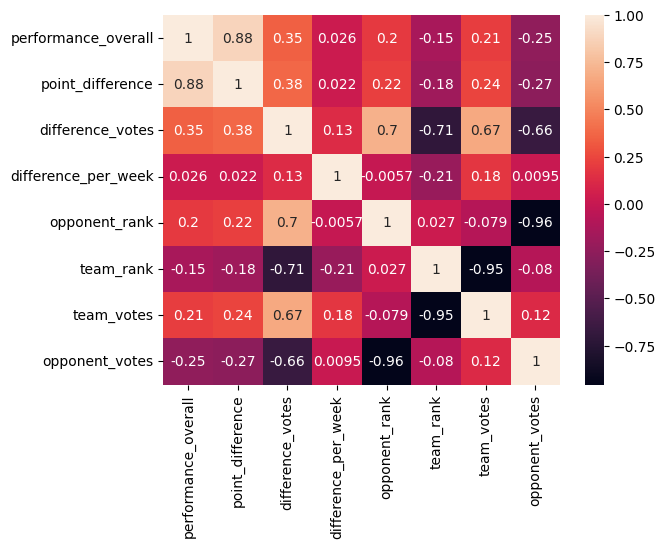

In [ ]:
corr_matrix = c.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show() #here is a correlation matrix so we can see how correlated all our features are.

# Pipeline



In [ ]:
#id	week	team	opponent_x	team_points_x	opponent_points_x	won_x	loss_x	offense_overall_x	defense_overall_x	total_win_count_x	total_loss_count_x	opponent_rank	opponent_votes	team_rank	team_votes
#Numerical,print generilization score,r^2,ypred vs ytrue scatter, which variables actually matter use shaply values. shap.plots.bar(shap_values)
#Shove into the index
%reload_ext autotime
import sklearn, shap, matplotlib.pyplot as plt, seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,HistGradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay
sklearn.set_config(transform_output= "pandas")
def disp(x):
  display(X.head(3))
seed = 3
target = 'difference_per_week'
ncaa_features=['performance_overall']
numeric_features = ['point_difference','difference_votes']
all_features = ['point_difference','difference_votes','performance_overall']
#difference per week is the difference of votes each team had per week
#difference of votes are the difference of the votes opponent and team had
#performance overall is defense and offense stats combined
#point difference is the difference between team and opponent score
mask = final2[target].notnull()
#df_all = df.loc[mask, all]
X = final2.loc[mask,all_features]
#z = final.loc[mask,ncaa_features]
y = final2.loc[mask,target]

In [ ]:
numeric_prep = Pipeline(steps = [('scaler',MinMaxScaler())])#StandardScaler()MinMaxScaler
ncaa_prep = Pipeline(steps=[('imputer',KNNImputer())])
combined_prep= ColumnTransformer(transformers=[('numeric',numeric_prep,numeric_features),('ncaa',ncaa_prep,ncaa_features)])#('ncaa',ncaa_prep,ncaa_features)
prep = Pipeline(steps = [('combined',combined_prep)])
display(prep)

def run_shap(model, n_clusters=10, n_samples=100):
    m = model.best_estimator_  # get best estimator from searchcv
    preproc, learner = m['prep'], m['learner']  # get preprocessor and learner as separate objects
    Z_holdout = preproc.transform(X_holdout).sample(n=min(n_samples, len(X_holdout)), random_state=seed)  # preprocess X_holdout and select sample
    Z_train   = preproc.transform(X_train)  # preprocess X_train
    try:
        f = learner.predict_proba
        fcn = lambda x: f(x)[:,0]  # for classifier, use probability of class 0
    except AttributeError:
        fcn = learner.predict  # for regressor, use prediction

    with contextlib.redirect_stderr(open(os.devnull, 'w')):  # suppress some annoying and unneccessary warnings
        # shap will take a very long time if we use the entire train set for background.
        # Instead we use the centers from a kmeans clustering of Z_train
        clusterer = KMeans(n_clusters=n_clusters, random_state=seed).fit(Z_train)  # fit kmeans clusterer
        centers = clusterer.cluster_centers_
        try:
            explainer = shap.Explainer(fcn, centers)  # create shap explainer using learn and cluster centers from Z_train
            shap_values = explainer(Z_holdout)  # compute shap values for Z_holdout
        except:
            print('Exception encountered trying to use shap.Explainer, reverting to shap.KernelExplainer')
            explainer = shap.KernelExplainer(fcn, centers)  # create shap explainer using learn and cluster centers from Z_train
            shap_values = explainer.shap_values(Z_holdout)  # compute shap values for Z_holdout
    S = pd.DataFrame(shap_values.values, columns=shap_values.feature_names)  # df of shap values
    srt = S.abs().median().argsort()[::-1]  # order columns by abs median
    S = S.iloc[:,srt]
    L = S.abs().apply(np.log1p)  # control fliers using L = ln(1+|S|)

    # analyze & plot L
    sns.stripplot(L * np.sign(S), orient='h', size=4)
    plt.title('ln1p SHAP signed')
    plt.show()
    sns.boxplot(L, orient='h')
    plt.title('ln1p SHAP absolute')
    plt.show()
    display(L.describe().T)  # print summary stats
    return S

Pipeline(steps=[('combined',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['point_difference',
                                                   'difference_votes']),
                                                 ('ncaa',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer())]),
                                                  ['performance_overall'])]))])

In [ ]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.10, random_state=seed)
display(prep)
# dictionary to store models
models = dict()


# # dictionary to store models
regessors = dict()

# # function to make training with different supervised learners convenient
def run_model(learner, hyperparameters):
#     # append final learner to pipeline
    estimator = Pipeline(steps = [('prep', prep), ('learner', learner)])

#     # prepare to tune hyperparameters using either exhaustive grid search or randomized grid search
    model = GridSearchCV(estimator, hyperparameters, cv=5, scoring='r2')
    #model = RandomizedSearchCV(estimator, hyperparameters, cv=5, scoring='r2')

    # give model a name based on its learner
    model.name = str(learner).split('(')[0]

    print(f'Fitting {model.name} with hyperparameter grid:', hyperparameters)
    model.fit(X_train, y_train)

    # Apply best model to holdout set to estimate generalization performance
    model.generalization_score = model.score(X_holdout, y_holdout)
    print(f'best model: R^2={model.generalization_score:.3f} with hyperparameters {model.best_params_}')

    # plot pred v true
    y_pred = model.predict(X_holdout)
    p = [np.min([y_pred, y_holdout]), np.max([y_pred, y_holdout])]
    plt.plot(p, p, 'black')
    plt.plot(y_holdout, y_pred, '.')
    plt.show()

Pipeline(steps=[('combined',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['point_difference',
                                                   'difference_votes']),
                                                 ('ncaa',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer())]),
                                                  ['performance_overall'])]))])

# Supervised Learning Model

##Random Forest Regressor

Fitting RandomForestRegressor with hyperparameter grid: {'prep__combined__ncaa__imputer__n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'learner__max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])}
best model: R^2=-0.003 with hyperparameters {'learner__max_depth': 5, 'prep__combined__ncaa__imputer__n_neighbors': 5}


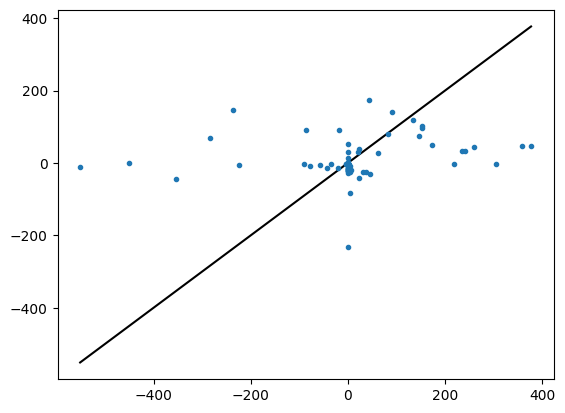

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
learner = RandomForestRegressor(random_state=seed)
hyperparameters = {
    'prep__combined__ncaa__imputer__n_neighbors': np.arange(5,15),
    'learner__max_depth': np.arange(5,15),
}
model = run_model(learner, hyperparameters)
regessors[model] = model
#shap_values = run_shap(model)

## KNearest Neigbhors Regression

Fitting KNeighborsRegressor with hyperparameter grid: {'prep__combined__ncaa__imputer__n_neighbors': array([10, 11, 12, 13, 14]), 'learner__n_neighbors': array([10, 11, 12, 13, 14])}
best model: R^2=-0.007 with hyperparameters {'learner__n_neighbors': 14, 'prep__combined__ncaa__imputer__n_neighbors': 10}


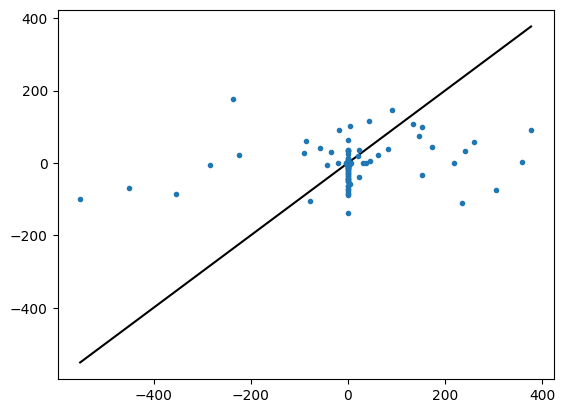

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
learner = KNeighborsRegressor()
hyperparameters = {
    'prep__combined__ncaa__imputer__n_neighbors':np.arange(10,15),
    'learner__n_neighbors':np.arange(10,15) ,
}
model = run_model(learner, hyperparameters)
regessors[model] = model
# shap_values=run_shap(model)

## Linear Regression

Fitting LinearRegression with hyperparameter grid: {'prep__combined__ncaa__imputer__n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'learner__n_jobs': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])}
best model: R^2=0.001 with hyperparameters {'learner__n_jobs': 5, 'prep__combined__ncaa__imputer__n_neighbors': 5}


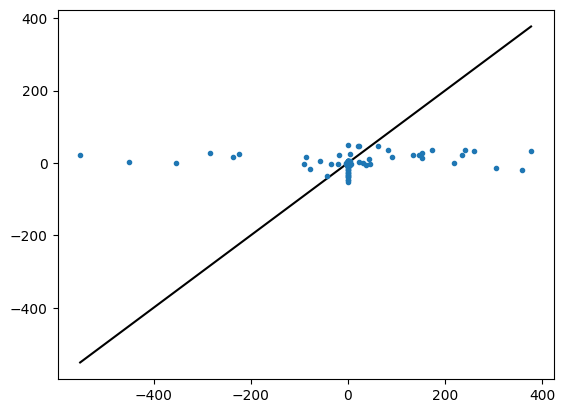

In [ ]:
from sklearn.linear_model import LinearRegression
learner = LinearRegression()
hyperparameters = {
    'prep__combined__ncaa__imputer__n_neighbors':np.arange(5,15),
    'learner__n_jobs': np.arange(5,15),
}
model = run_model(learner, hyperparameters)
regessors[model] = model
# shap_values=run_shap(model)

## Support Vector Machines

Fitting SVR with hyperparameter grid: {'prep__combined__ncaa__imputer__n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'learner__C': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])}
best model: R^2=0.024 with hyperparameters {'learner__C': 14, 'prep__combined__ncaa__imputer__n_neighbors': 5}


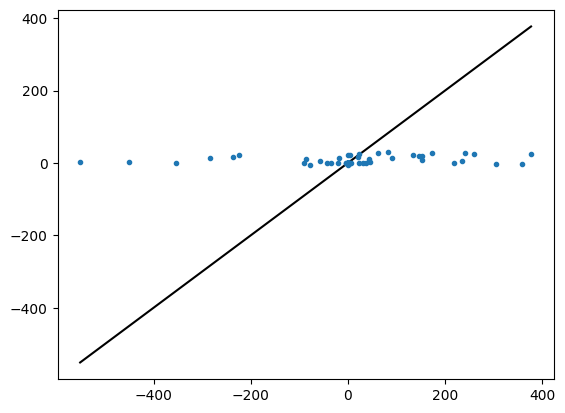

In [ ]:
from sklearn.svm import SVR
learner = SVR()
hyperparameters = {
    'prep__combined__ncaa__imputer__n_neighbors': np.arange(5,15),
    'learner__C': np.arange(5,15),
}
model = run_model(learner, hyperparameters)
regessors[model] = model
# shap_values=run_shap(model)

## Hist Gradient Boosting Regression

Fitting HistGradientBoostingRegressor with hyperparameter grid: {'prep__combined__ncaa__imputer__n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'learner__max_iter': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])}
best model: R^2=0.011 with hyperparameters {'learner__max_iter': 5, 'prep__combined__ncaa__imputer__n_neighbors': 5}


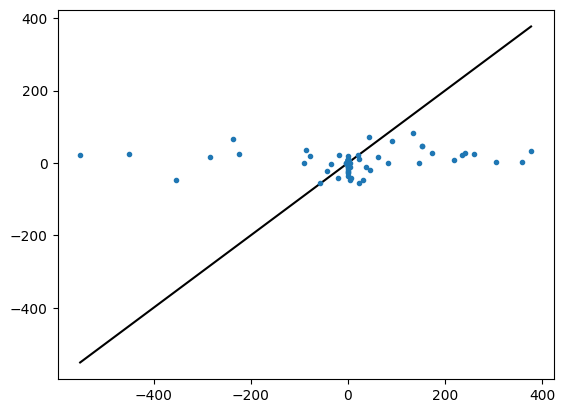

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
learner = HistGradientBoostingRegressor()
hyperparameters = {
    'prep__combined__ncaa__imputer__n_neighbors': np.arange(5,15),
    'learner__max_iter':np.arange(5,15),
}
model = run_model(learner, hyperparameters)
regessors[model] = model
# shap_values=run_shap(model)

#Conclusion

None of my models have performed well and I cant seem to find the problems with the data. I tried many different combinations of features and none of them gave me any solid results. It may be that the variability in voting doesnt have any correlation to a teams win loss and this may show human error and bias in the NCAA voting system.


# Classifier

I couldn't get good results with a regressor and I think rank does have a natural order so I wanted to try a classifier model and see if I could get better results.


In [ ]:
import os, pathlib, joblib, contextlib, google.colab, missingno as msno
import numpy as np, pandas as pd, sklearn, shap, matplotlib.pyplot as plt, seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay

In [ ]:
# In order to make this a classification task, we will use pandas qcut function to bin the target values into n_labels classes with roughly equal frequencies
y = final2.loc[mask, target]
n_labels = 2
y_binned = pd.qcut(final2.loc[mask, target], q=n_labels, precision=1)
y    = y_binned.cat.codes
bins = y_binned.cat.categories.astype(str).to_list()
numeric_prep = Pipeline(steps = [('scaler',MinMaxScaler())])#StandardScaler()MinMaxScaler
ncaa_prep = Pipeline(steps=[('imputer',KNNImputer())])
combined_prep= ColumnTransformer(transformers=[('numeric',numeric_prep,numeric_features),('ncaa',ncaa_prep,ncaa_features)])#('ncaa',ncaa_prep,ncaa_features)
prep = Pipeline(steps = [('combined',combined_prep)])
display(prep)
# create holdout set to estimate generalization performance after tuning
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.10, random_state=seed)

# dictionary to store models
classifiers = dict()

# function to make training with different supervised learners convenient
def run_model(learner, hyperparameters):
    # append final learner to pipeline
    estimator = Pipeline(steps = [('prep', prep), ('learner', learner)])

    # prepare to tune hyperparameters using either exhaustive grid search or randomized grid search
    model =       GridSearchCV(estimator, hyperparameters, cv=5, scoring='f1_micro')
    # model = RandomizedSearchCV(estimator, hyperparameters, cv=5, scoring='f1_micro')

    # give model a name based on its learner
    model.name = str(learner).split('(')[0]

    print(f'Fitting {model.name} with hyperparameter grid:', hyperparameters)
    model.fit(X_train, y_train)

    # Apply best model to holdout set to estimate generalization performance
    model.generalization_score = model.score(X_holdout, y_holdout)
    print(f'best model: F1={model.generalization_score:.3f} with hyperparameters {model.best_params_}')
    print(classification_report(y_holdout, model.predict(X_holdout), target_names=bins))

    ConfusionMatrixDisplay.from_estimator(model, X_holdout, y_holdout, display_labels=bins)
    plt.show()

    if n_labels == 2:
        RocCurveDisplay.from_estimator(model, X_holdout, y_holdout)
        plt.plot([0,1],[0,1])
        plt.show()

Pipeline(steps=[('combined',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['point_difference',
                                                   'difference_votes']),
                                                 ('ncaa',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer())]),
                                                  ['performance_overall'])]))])

## Random Forest Classifier

Fitting RandomForestClassifier with hyperparameter grid: {'prep__combined__ncaa__imputer__n_neighbors': [2, 4], 'learner__max_depth': [3, 6, 9]}
best model: F1=0.899 with hyperparameters {'learner__max_depth': 6, 'prep__combined__ncaa__imputer__n_neighbors': 2}
                precision    recall  f1-score   support

(-1096.1, 0.0]       0.96      0.92      0.94       122
  (0.0, 749.0]       0.69      0.81      0.75        27

      accuracy                           0.90       149
     macro avg       0.82      0.87      0.84       149
  weighted avg       0.91      0.90      0.90       149



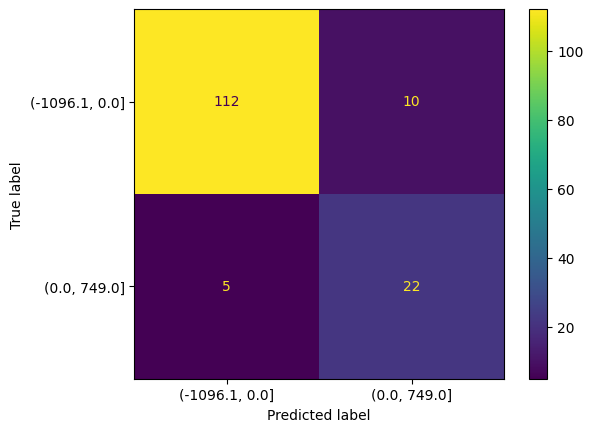

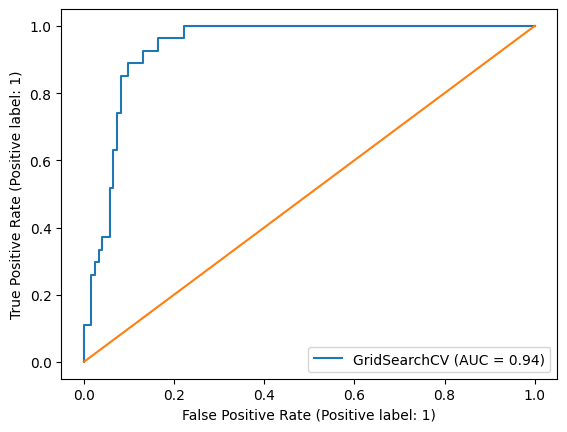

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
learner = RandomForestClassifier(random_state=seed)
hyperparameters = {
    'prep__combined__ncaa__imputer__n_neighbors': [2,4],
    'learner__max_depth': [3,6,9],
}
model = run_model(learner, hyperparameters)
classifiers[model] = model


## KNN Classifier

Fitting KNeighborsClassifier with hyperparameter grid: {'prep__combined__ncaa__imputer__n_neighbors': [3, 7], 'learner__n_neighbors': [3, 6, 9]}
best model: F1=0.872 with hyperparameters {'learner__n_neighbors': 9, 'prep__combined__ncaa__imputer__n_neighbors': 3}
                precision    recall  f1-score   support

(-1096.1, 0.0]       0.91      0.94      0.92       122
  (0.0, 749.0]       0.68      0.56      0.61        27

      accuracy                           0.87       149
     macro avg       0.79      0.75      0.77       149
  weighted avg       0.86      0.87      0.87       149



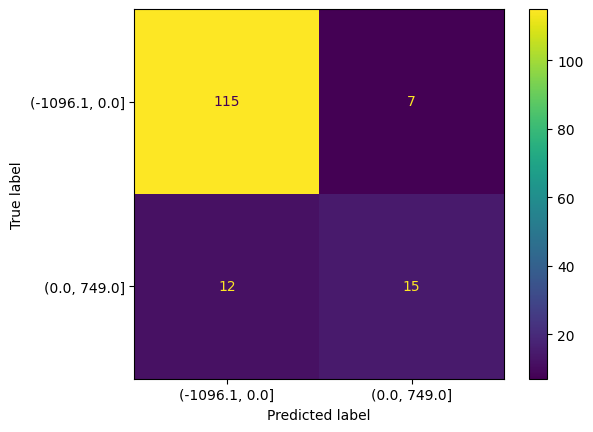

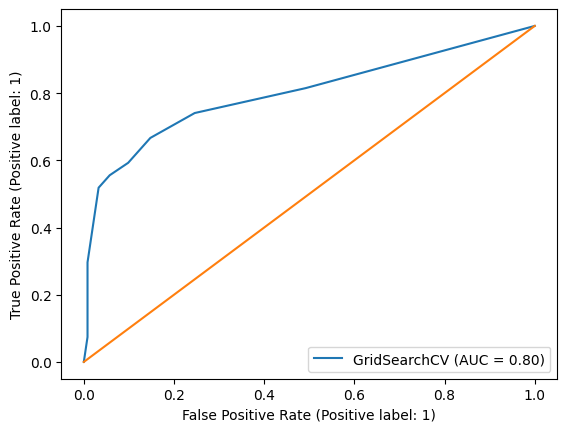

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
learner = KNeighborsClassifier()
hyperparameters = {
    'prep__combined__ncaa__imputer__n_neighbors': [3,7],
    'learner__n_neighbors': [3,6,9],
}
model = run_model(learner, hyperparameters)
classifiers[model] = model

##Support Vector Machine Classifier

Fitting SVC with hyperparameter grid: {'prep__combined__ncaa__imputer__n_neighbors': [3, 7], 'learner__C': array([0.1 , 2.55, 5.  ])}
best model: F1=0.886 with hyperparameters {'learner__C': 5.0, 'prep__combined__ncaa__imputer__n_neighbors': 3}
                precision    recall  f1-score   support

(-1096.1, 0.0]       0.91      0.96      0.93       122
  (0.0, 749.0]       0.75      0.56      0.64        27

      accuracy                           0.89       149
     macro avg       0.83      0.76      0.79       149
  weighted avg       0.88      0.89      0.88       149



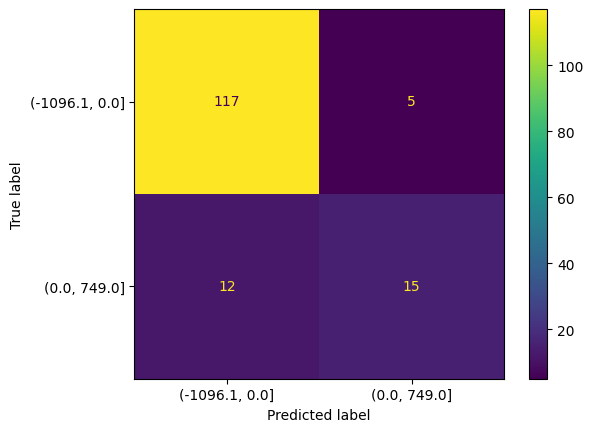

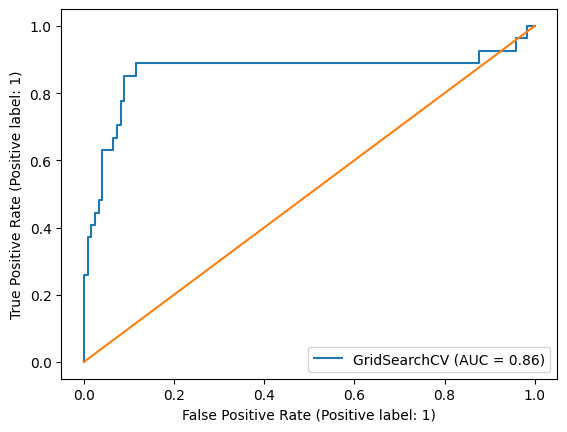

In [ ]:
from sklearn.svm import SVC
learner = SVC()
hyperparameters = {
    'prep__combined__ncaa__imputer__n_neighbors': [3,7],
    'learner__C': np.linspace(0.1,5,3),
}
model = run_model(learner, hyperparameters)
classifiers[model] = model